theta0: 1.5707963267948966, omega0: 0.0
b: 0.1, m: 1.0, g: 9.81, L: 1.0
[0, -0.9793658173053843]


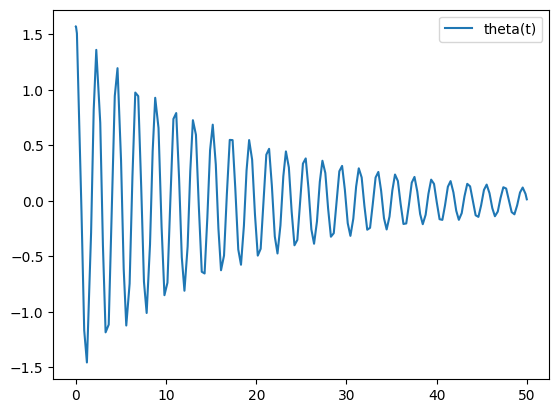

In [17]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from manim import *

g = 9.81
L = 1.0
b = 0.1
m = 1.0

theta0 = np.pi/2
omega0 = 0.0

t = np.linspace(0,50,1)

print(f"theta0: {theta0}, omega0: {omega0}")
print(f"b: {b}, m: {m}, g: {g}, L: {L}")

def pendulum(t, y):
    theta, omega = y
    dydt = [omega, -b/m * omega - g/L * np.sin(theta)]
    return dydt

test_y = [0.1, 0]  # Example initial condition
print(pendulum(0, test_y))  # Should return a list with two elements

y0 = [theta0, omega0]
sol = solve_ivp(fun=pendulum, t_span=(0,50), y0=y0, method='RK45')

plt.plot(sol.t, sol.y[0], label="theta(t)")
#plt.plot(sol.t, sol.y[1], label="omega(t)")
plt.legend()
plt.show()


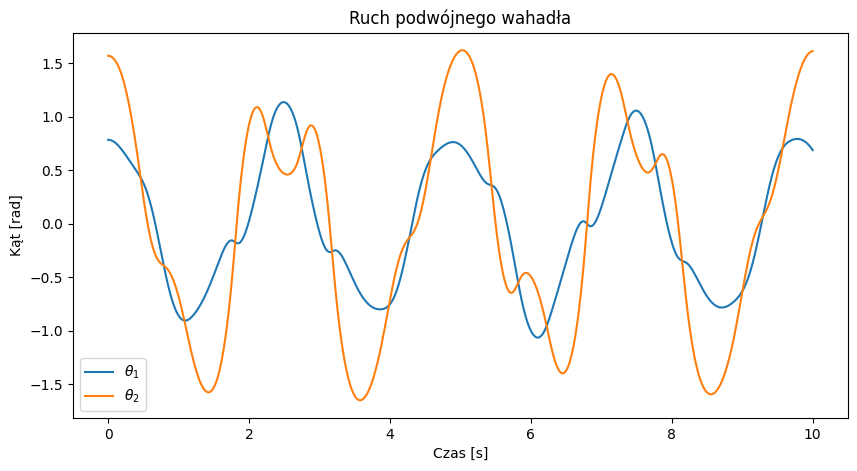

In [16]:
def pendulemDual(t, y):
    theta1, theta2, p1, p2 = y

    d=(m*L**2)*(16-9*np.cos(theta1-theta2)**2)

    theta1_dot = (6*(2*p1 - 3*np.cos(theta1-theta2)*p2))/d
    theta2_dot = (6*(8*p2 - 3*np.cos(theta1-theta2)*p1))/d

    p1_dot = (-1/2)*(m*L**2)*(theta1_dot*theta2_dot*np.sin(theta1-theta2)+3*g*np.sin(theta1)/L)
    p2_dot = (-1/2)*(m*L**2)*(-theta1_dot*theta2_dot*np.sin(theta1-theta2)+g*np.sin(theta2)/L)

    return [theta1_dot, theta2_dot, p1_dot, p2_dot]


y0 = [np.pi/4, np.pi/2,0,0]

t_span = (0, 10)  # od 0 do 10 sekund
t_eval = np.linspace(0, 10, 1000)  # wartości czasu dla rozwiązania

# Rozwiązywanie układu równań
sol = solve_ivp(pendulemDual, t_span, y0, method='RK45', t_eval=t_eval)

plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], label=r'$\theta_1$')
plt.plot(sol.t, sol.y[1], label=r'$\theta_2$')
plt.xlabel('Czas [s]')
plt.ylabel('Kąt [rad]')
plt.legend()
plt.title('Ruch podwójnego wahadła')
plt.show()

In [18]:
%load_ext manim

The manim module is not an IPython extension.


In [23]:
%%manim -qm -v WARNING DoublePendulum

class DoublePendulum(Scene):
    def construct(self):
        times = ValueTracker(0)
        pendulum1 = always_redraw(Line(ORIGIN, [L * np.sin(y0[times.get_value()]), -L * np.cos(y0[times.get_value()]), 0], color=BLUE))
        pendulum2 = always_redraw(Line(pendulum1.get_end(), [L * np.sin(y0[times.get_value()]) + pendulum1.get_end()[times.get_value],-L * np.cos(y0[times.get_value()]) + pendulum1.get_end()[times.get_value()], 0], color=RED))

        bob1 = always_redraw(Dot(pendulum1.get_end(), color=BLUE))
        bob2 = always_redraw(Dot(pendulum2.get_end(), color=RED))
        pendulum_group = VGroup(pendulum1, pendulum2, bob1, bob2)

        self.play(times.animate.set_value(1000), rate_func=linear, run_time=10)
        

Manim Community v0.18.1

TypeError: list indices must be integers or slices, not numpy.float64